In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [75]:
tc_df=pd.read_csv("C:\\Users\\Mani\\Desktop\\Excelr\\Assignments\\Multiple_Linear_Regression\\ToyotaCorolla.csv",encoding='latin1')
tc_df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [76]:
tc_df=tc_df[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]
tc_df

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [77]:
tc_df=tc_df.rename({'Age_08_04':'Age'},axis=1)
tc_df.head()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


# EDA

In [78]:
tc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age            1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [79]:
tc_df.isnull().sum()

Price            0
Age              0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [80]:
# there are no null values

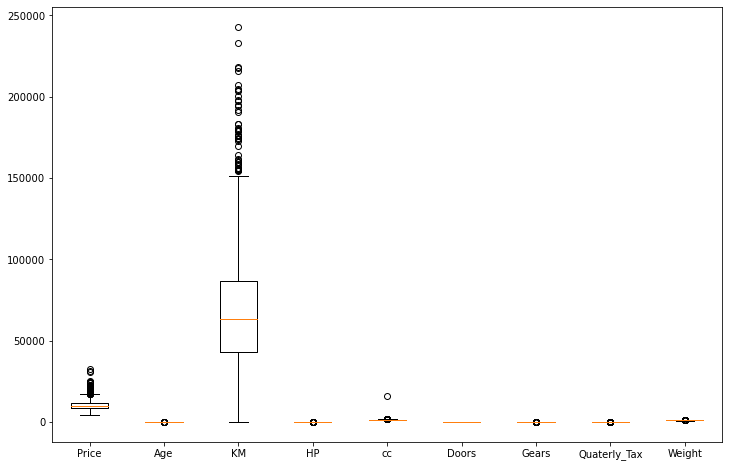

In [81]:
labels=['Price','Age','KM','HP','cc','Doors','Gears','Quaterly_Tax','Weight']
plt.figure(figsize=(12,8))
plt.boxplot(tc_df,labels=labels)
plt.show()

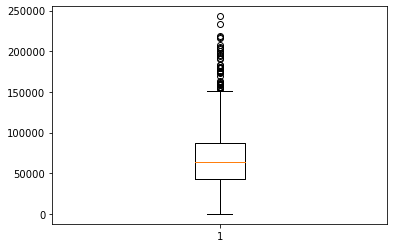

In [82]:
km_box=plt.boxplot(tc_df.KM)

In [83]:
[item.get_ydata() for item in km_box['fliers']]

[array([243000, 180638, 179860, 178858, 161000, 158320, 216000, 198167,
        176000, 174139, 174000, 205000, 204250, 194545, 190900, 183500,
        176184, 174833, 155720, 155500, 154783, 154462, 232940, 218118,
        217764, 207114, 203254, 200732, 197501, 194765, 191620, 183277,
        180378, 178800, 176177, 176000, 172980, 170000, 164000, 161775,
        160000, 159968, 159908, 158492, 156204, 156169, 155210, 155000,
        154900], dtype=int64)]

# Remove row outliers

In [84]:
tc_df=tc_df[tc_df['KM']<150000]
tc_df.shape

(1382, 9)

In [85]:
# Correlation analysis

In [86]:
tc_df.corr()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.882777,-0.580549,0.286919,0.150327,0.185782,0.062488,0.294597,0.621055
Age,-0.882777,1.000000,0.555617,-0.138502,-0.111078,-0.151088,-0.004104,-0.240429,-0.493174
KM,-0.580549,0.555617,1.000000,-0.224393,0.041420,-0.024826,0.028009,0.148232,-0.119204
HP,0.286919,-0.138502,-0.224393,1.000000,0.086525,0.090740,0.214154,-0.231840,0.142370
cc,0.150327,-0.111078,0.041420,0.086525,1.000000,0.084524,0.017900,0.280880,0.317752
Doors,0.185782,-0.151088,-0.024826,0.090740,0.084524,1.000000,-0.161436,0.126724,0.307898
Gears,0.062488,-0.004104,0.028009,0.214154,0.017900,-0.161436,1.000000,0.002422,0.024625
Quarterly_Tax,0.294597,-0.240429,0.148232,-0.231840,0.280880,0.126724,0.002422,1.000000,0.632901
Weight,0.621055,-0.493174,-0.119204,0.142370,0.317752,0.307898,0.024625,0.632901,1.000000


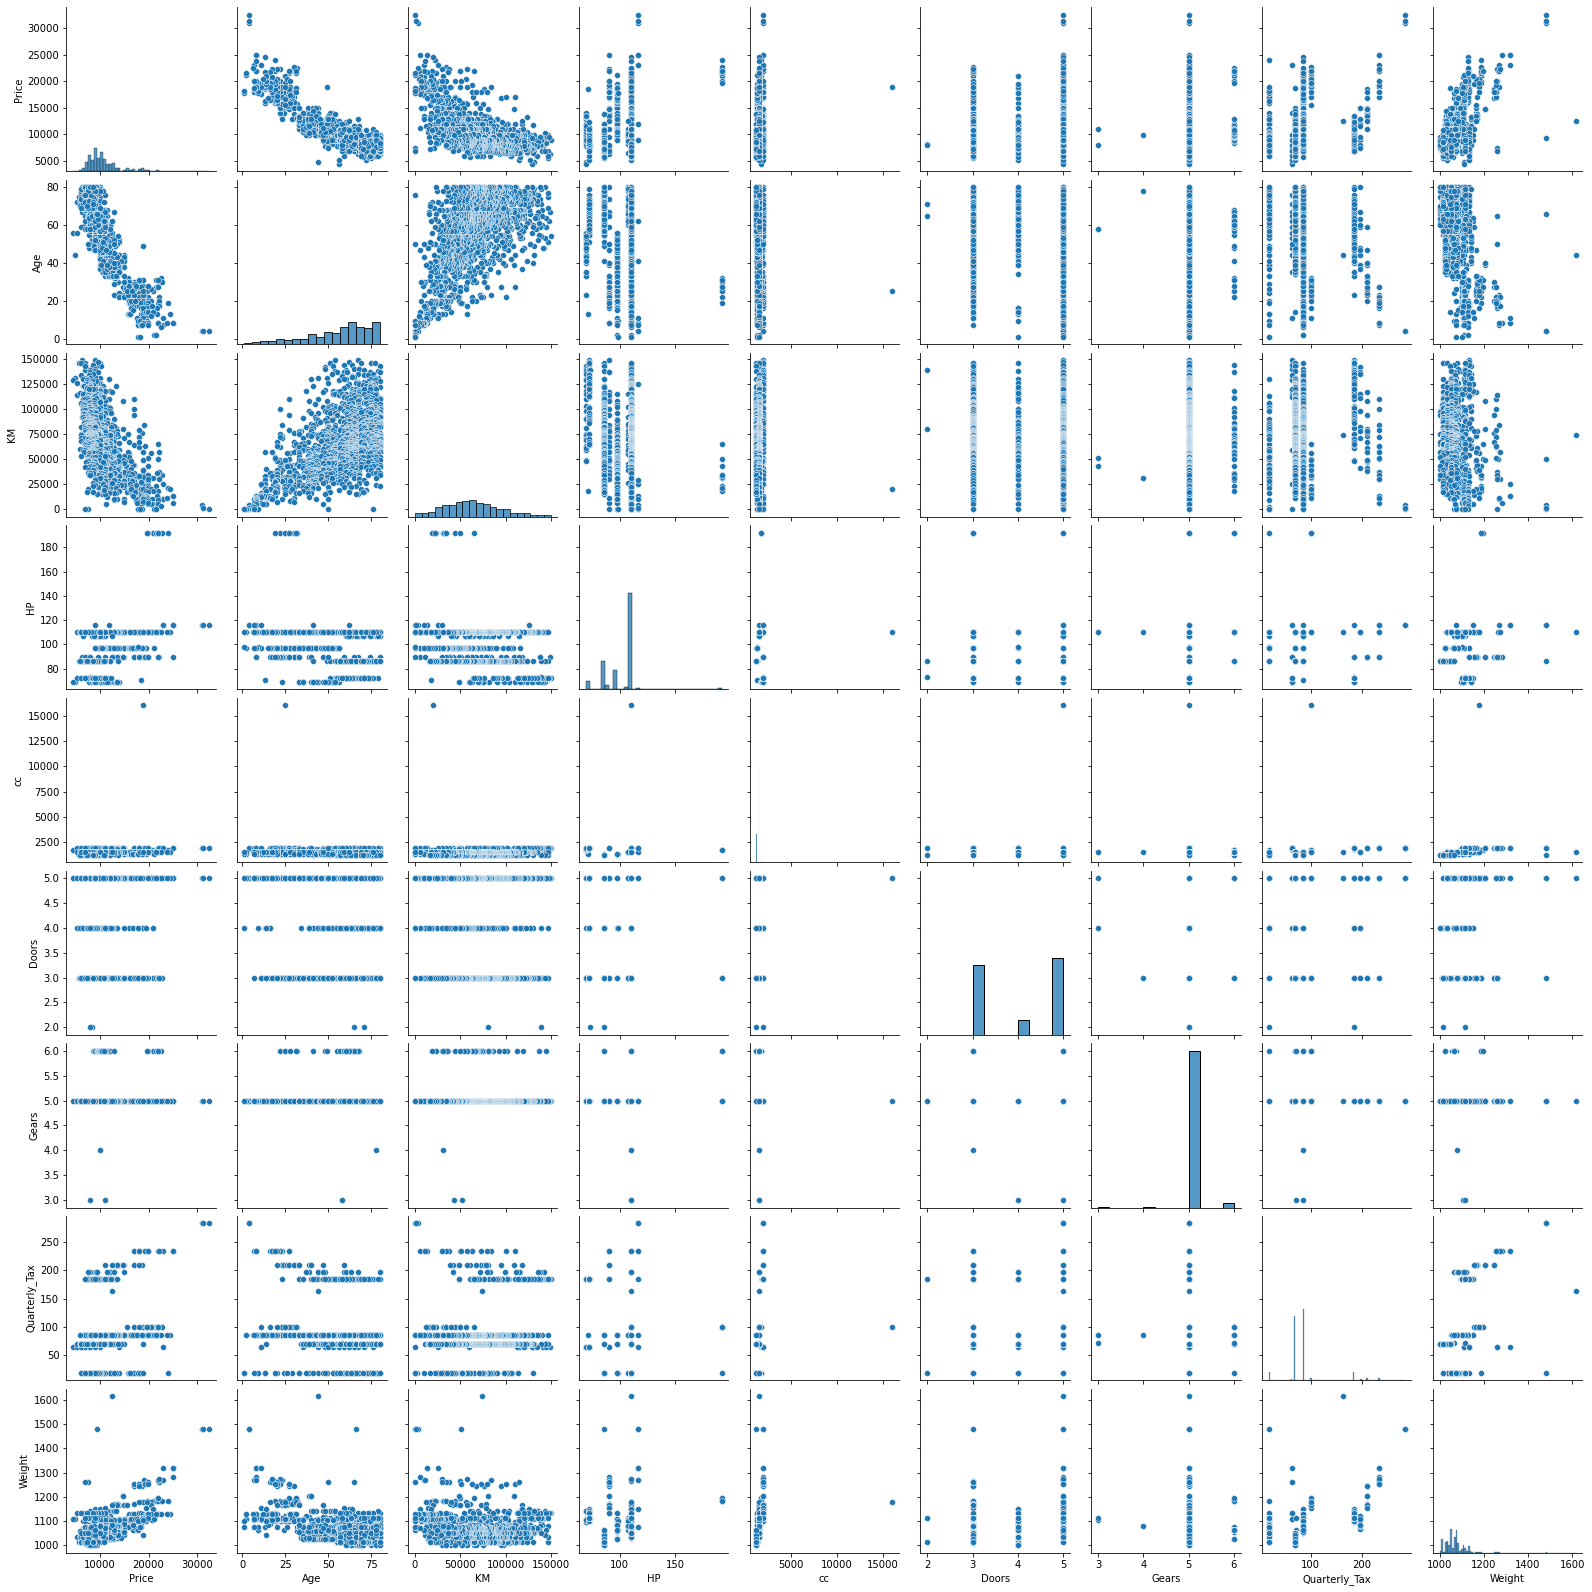

In [87]:
sns.pairplot(tc_df)

In [88]:
# HP,cc,Doors+Gears+Quarterly

# Model Building

In [89]:
# MODEL :1

In [90]:
import statsmodels.formula.api as smf
model_basic=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=tc_df).fit()
model_basic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     1111.
Date:                Mon, 10 Jan 2022   Prob (F-statistic):               0.00
Time:                        21:26:59   Log-Likelihood:                -11895.
No. Observations:                1382   AIC:                         2.381e+04
Df Residuals:                    1373   BIC:                         2.386e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5008.6158   1424.408     -3.516      0.000   -7802.867   -2214.364
Age            -123.7598      2.697    -45.889      0.000    -129.050    -118.469
KM               -0.0205      0.001    -13.706      0.000      -0.023      -0.018
HP               33.1093      2.877     11.510      0.000      27.466      38.752
cc               -0.1300      0.089     -1.453      0.146      -0.306       0.046
Doors            -2.4595     40.339     -0.061      0.951     -81.592      76.673
Gears           584.7615    197.005      2.968      0.003     198.299     971.224
Quarterly_Tax     4.7883      1.374      3.484      0.001       2.092       7.485
Weight           16.3766      1.089     15.036      0.000      14.240      18.513
==============================================================================
Omnibus:                      138.279   Durbin-Watson:                   1.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              891.113
Skew:                          -0.184   Prob(JB):                    3.14e-194
Kurtosis:                       6.917   Cond. No.                     2.86e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
# Doors has no importance in building the model as it has probability of 0.968

(array([  3.,   9.,  90., 476., 629., 158.,  12.,   2.,   1.,   2.]),
 array([-6501.40294873, -4936.29472666, -3371.18650459, -1806.07828252,
         -240.97006044,  1324.13816163,  2889.2463837 ,  4454.35460577,
         6019.46282784,  7584.57104991,  9149.67927199]),
 <BarContainer object of 10 artists>)

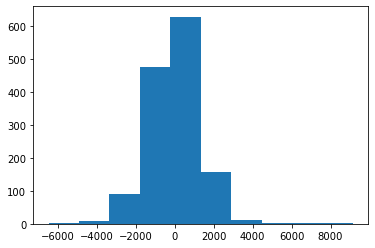

In [92]:
pred_basic=model_basic.predict(tc_df)
error_basic=pred_basic-tc_df.Price
plt.hist(error_basic)

<AxesSubplot:xlabel='Price'>

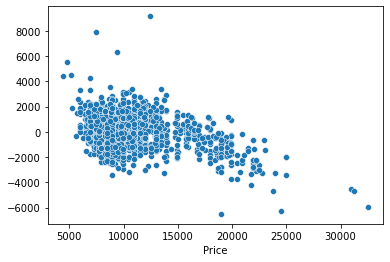

In [93]:
sns.scatterplot(x=tc_df.Price,y=error_basic,data=tc_df)

In [94]:
# MODEL:2 (Deleting Doors)

In [95]:
model_del_Doors=smf.ols('Price~Age+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=tc_df).fit()
model_del_Doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     1271.
Date:                Mon, 10 Jan 2022   Prob (F-statistic):               0.00
Time:                        21:27:21   Log-Likelihood:                -11895.
No. Observations:                1382   AIC:                         2.381e+04
Df Residuals:                    1374   BIC:                         2.385e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5011.9506   1422.841     -3.522      0.000   -7803.127   -2220.774
Age            -123.7565      2.695    -45.913      0.000    -129.044    -118.469
KM               -0.0205      0.001    -13.738      0.000      -0.023      -0.018
HP               33.0983      2.870     11.533      0.000      27.468      38.728
cc               -0.1299      0.089     -1.453      0.146      -0.305       0.046
Gears           587.0616    193.289      3.037      0.002     207.888     966.235
Quarterly_Tax     4.7945      1.370      3.499      0.000       2.107       7.482
Weight           16.3603      1.055     15.503      0.000      14.290      18.430
==============================================================================
Omnibus:                      137.963   Durbin-Watson:                   1.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              887.553
Skew:                          -0.183   Prob(JB):                    1.86e-193
Kurtosis:                       6.909   Cond. No.                     2.85e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.85e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [96]:
# MODEL :3 (Deleting Gears)

In [97]:
model_del_Doors_Gears=smf.ols('Price~Age+KM+HP+cc+Quarterly_Tax+Weight',data=tc_df).fit()
model_del_Doors_Gears.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     1472.
Date:                Mon, 10 Jan 2022   Prob (F-statistic):               0.00
Time:                        21:27:22   Log-Likelihood:                -11900.
No. Observations:                1382   AIC:                         2.381e+04
Df Residuals:                    1375   BIC:                         2.385e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2134.6146   1064.769     -2.005      0.045   -4223.362     -45.867
Age            -123.9110      2.703    -45.842      0.000    -129.213    -118.609
KM               -0.0202      0.001    -13.533      0.000      -0.023      -0.017
HP               35.1256      2.800     12.547      0.000      29.634      40.617
cc               -0.1338      0.090     -1.492      0.136      -0.310       0.042
Quarterly_Tax     5.0667      1.371      3.695      0.000       2.377       7.757
Weight           16.2105      1.057     15.332      0.000      14.136      18.285
==============================================================================
Omnibus:                      134.501   Durbin-Watson:                   1.574
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              833.413
Skew:                          -0.184   Prob(JB):                    1.06e-181
Kurtosis:                       6.787   Cond. No.                     2.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [98]:
# MODEL : 4 (Deleting cc)

In [99]:
model_del_Doors_Gears_cc=smf.ols('Price~Age+KM+HP+Quarterly_Tax+Weight',data=tc_df).fit()
model_del_Doors_Gears_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     1765.
Date:                Mon, 10 Jan 2022   Prob (F-statistic):               0.00
Time:                        21:27:23   Log-Likelihood:                -11901.
No. Observations:                1382   AIC:                         2.381e+04
Df Residuals:                    1376   BIC:                         2.385e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2024.6097   1062.686     -1.905      0.057   -4109.269      60.050
Age            -123.9629      2.704    -45.845      0.000    -129.267    -118.659
KM               -0.0203      0.001    -13.612      0.000      -0.023      -0.017
HP               34.6853      2.785     12.453      0.000      29.222      40.149
Quarterly_Tax     4.8156      1.361      3.537      0.000       2.145       7.486
Weight           15.9829      1.047     15.270      0.000      13.930      18.036
==============================================================================
Omnibus:                      131.294   Durbin-Watson:                   1.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              797.362
Skew:                          -0.174   Prob(JB):                    7.16e-174
Kurtosis:                       6.705   Cond. No.                     2.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [100]:
# MODEL :5 (Delete Quarterly Tax)

In [101]:
model_del_Doors_Gears_cc_QT=smf.ols('Price~Age+KM+HP+Weight',data=tc_df).fit()
model_del_Doors_Gears_cc_QT.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     2184.
Date:                Mon, 10 Jan 2022   Prob (F-statistic):               0.00
Time:                        21:27:24   Log-Likelihood:                -11907.
No. Observations:                1382   AIC:                         2.382e+04
Df Residuals:                    1377   BIC:                         2.385e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3797.4338    940.967     -4.036      0.000   -5643.318   -1951.550
Age         -124.5607      2.710    -45.964      0.000    -129.877    -119.245
KM            -0.0191      0.001    -13.100      0.000      -0.022      -0.016
HP            30.9306      2.586     11.962      0.000      25.858      36.003
Weight        18.3382      0.811     22.613      0.000      16.747      19.929
==============================================================================
Omnibus:                      189.423   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1454.194
Skew:                          -0.377   Prob(JB):                         0.00
Kurtosis:                       7.969   Cond. No.                     1.87e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [102]:
# MODEL : 6 (Delete HP)

In [103]:
model_del_Doors_Gears_cc_hp=smf.ols('Price~Age+KM+Weight',data=tc_df).fit()
model_del_Doors_Gears_cc_hp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     2597.
Date:                Mon, 10 Jan 2022   Prob (F-statistic):               0.00
Time:                        21:27:24   Log-Likelihood:                -11975.
No. Observations:                1382   AIC:                         2.396e+04
Df Residuals:                    1378   BIC:                         2.398e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1844.2432    973.298     -1.895      0.058   -3753.549      65.063
Age         -122.8539      2.842    -43.223      0.000    -128.430    -117.278
KM            -0.0227      0.002    -15.097      0.000      -0.026      -0.020
Weight        19.5928      0.845     23.198      0.000      17.936      21.250
==============================================================================
Omnibus:                      218.323   Durbin-Watson:                   1.559
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2257.430
Skew:                          -0.379   Prob(JB):                         0.00
Kurtosis:                       9.215   Cond. No.                     1.84e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [104]:
# MODEL : 7 (Deleting KM)

In [105]:
model_del_Doors_Gears_cc_kp=smf.ols('Price~Age+KM+Weight',data=tc_df).fit()
model_del_Doors_Gears_cc_kp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     2597.
Date:                Mon, 10 Jan 2022   Prob (F-statistic):               0.00
Time:                        21:27:27   Log-Likelihood:                -11975.
No. Observations:                1382   AIC:                         2.396e+04
Df Residuals:                    1378   BIC:                         2.398e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1844.2432    973.298     -1.895      0.058   -3753.549      65.063
Age         -122.8539      2.842    -43.223      0.000    -128.430    -117.278
KM            -0.0227      0.002    -15.097      0.000      -0.026      -0.020
Weight        19.5928      0.845     23.198      0.000      17.936      21.250
==============================================================================
Omnibus:                      218.323   Durbin-Watson:                   1.559
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2257.430
Skew:                          -0.379   Prob(JB):                         0.00
Kurtosis:                       9.215   Cond. No.                     1.84e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [106]:
# MODEL : 8 (dELETING BOTH KP AND HM)

In [107]:
model_del_Doors_Gears_cc_hp_KM=smf.ols('Price~Age+Weight',data=tc_df).fit()
model_del_Doors_Gears_cc_hp_KM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     3247.
Date:                Mon, 10 Jan 2022   Prob (F-statistic):               0.00
Time:                        21:27:29   Log-Likelihood:                -12081.
No. Observations:                1382   AIC:                         2.417e+04
Df Residuals:                    1379   BIC:                         2.418e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    991.9777   1030.582      0.963      0.336   -1029.700    3013.656
Age         -147.5370      2.509    -58.802      0.000    -152.459    -142.615
Weight        16.8635      0.890     18.941      0.000      15.117      18.610
==============================================================================
Omnibus:                      152.755   Durbin-Watson:                   1.380
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1139.830
Skew:                          -0.187   Prob(JB):                    3.08e-248
Kurtosis:                       7.433   Cond. No.                     2.71e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
# MODEL :9 (Deleting weight)

In [109]:
model_del_Doors_Gears_cc_QT_Wgt=smf.ols('Price~Age+KM+HP',data=tc_df).fit()
model_del_Doors_Gears_cc_QT_Wgt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     2001.
Date:                Mon, 10 Jan 2022   Prob (F-statistic):               0.00
Time:                        21:27:41   Log-Likelihood:                -12125.
No. Observations:                1382   AIC:                         2.426e+04
Df Residuals:                    1378   BIC:                         2.428e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.635e+04    354.965     46.047      0.000    1.56e+04     1.7e+04
Age         -156.3609      2.712    -57.661      0.000    -161.680    -151.041
KM            -0.0114      0.002     -6.860      0.000      -0.015      -0.008
HP            38.4925      3.001     12.825      0.000      32.605      44.380
==============================================================================
Omnibus:                      413.026   Durbin-Watson:                   1.366
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2977.330
Skew:                           1.193   Prob(JB):                         0.00
Kurtosis:                       9.784   Cond. No.                     6.01e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [110]:
df_rsqr={'Models':['Basic model','Deleting Doors','Deleting Gears','Deleting cc','Deleting Quarterly Tax ','Deleting hp',
                   'Deleting km','Deleting hp & km','Deleting Weight'],
         'R Squared':[model_basic.rsquared,model_del_Doors.rsquared,model_del_Doors_Gears.rsquared,
                      model_del_Doors_Gears_cc.rsquared,model_del_Doors_Gears_cc_QT.rsquared,model_del_Doors_Gears_cc_hp.rsquared,
                      model_del_Doors_Gears_cc_kp.rsquared,model_del_Doors_Gears_cc_hp_KM.rsquared,model_del_Doors_Gears_cc_QT_Wgt.rsquared
                    ],
         'AIC' :[model_basic.aic,model_del_Doors.aic,model_del_Doors_Gears.aic,
                      model_del_Doors_Gears_cc.aic,model_del_Doors_Gears_cc_QT.aic,model_del_Doors_Gears_cc_hp.aic,
                      model_del_Doors_Gears_cc_kp.aic,model_del_Doors_Gears_cc_hp_KM.aic,model_del_Doors_Gears_cc_QT_Wgt.aic]
        }
rsqr_df=pd.DataFrame(df_rsqr)
rsqr_df

,Models,R Squared,AIC
0,Basic model,0.866207,23808.355698
1,Deleting Doors,0.866207,23806.359440
2,Deleting Gears,0.865309,23813.606870
3,Deleting cc,0.865090,23813.842165
4,Deleting Quarterly Tax,0.863864,23824.350415
5,Deleting hp,0.849717,23958.979946
6,Deleting km,0.849717,23958.979946
7,Deleting hp & km,0.824859,24168.522424
8,Deleting Weight,0.813312,24258.765289


In [111]:
predict_price1=model_del_Doors_Gears_cc_QT.predict(tc_df)
error_price1=tc_df.Price-predict_price1
error_price1.sum()

-6.830741767771542e-07

(array([  2.,   1.,   1.,   6.,  80., 494., 627., 148.,  17.,   6.]),
 array([-9870.02133352, -8265.51840898, -6661.01548444, -5056.51255989,
        -3452.00963535, -1847.50671081,  -243.00378626,  1361.49913828,
         2966.00206282,  4570.50498737,  6175.00791191]),
 <BarContainer object of 10 artists>)

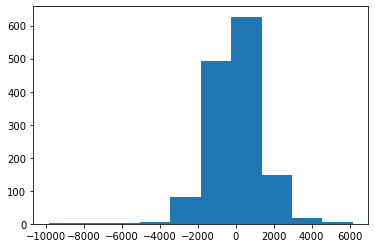

In [112]:
plt.hist(error_price1)

In [ ]:
sns.scatter()